<a href="https://colab.research.google.com/github/intu99/ML-Agent/blob/master/TFLight02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip fruits.zip

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 4s 121ms/step - loss: 0.8753 - accuracy: 0.6500 - val_loss: 0.4950 - val_accuracy: 0.9091
Epoch 2/10
23/23 [==============================] - 5s 159ms/step - loss: 0.3510 - accuracy: 0.8739 - val_loss: 0.3976 - val_accuracy: 0.8485
Epoch 3/10
23/23 [==============================] - 4s 140ms/step - loss: 0.2045 - accuracy: 0.9348 - val_loss: 0.3415 - val_accuracy: 0.9242
Epoch 4/10
23/23 [==============================] - 2s 80ms/step - loss: 0.1656 - accuracy: 0.9435 - val_loss: 0.3308 - val_accuracy: 0.9242
Epoch 5/10
23/23 [==============================] - 2s 79ms/step - loss: 0.1127 - accuracy: 0.9652 - val_loss: 0.2646 - val_accuracy: 0.9697
Epoch 6/10
23/23 [==============================] - 2s 80ms/step - loss: 0.1009 - accuracy: 0.9696 - val_loss: 0.2505 - val_accuracy: 0.9697
Epoch 7/10
23/23 [==============

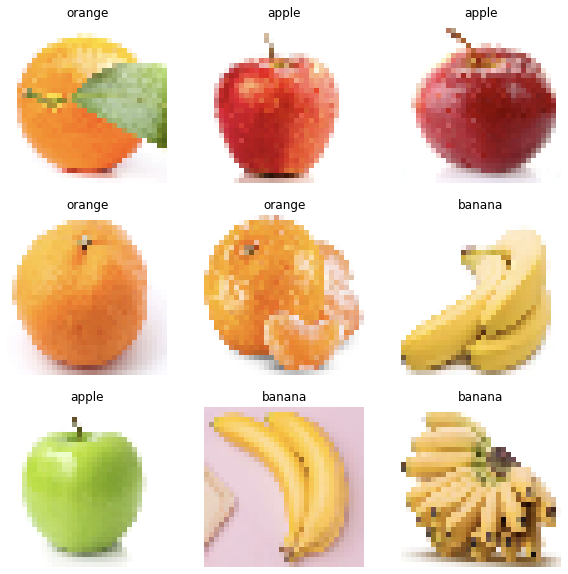

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
img_height,img_width=32,32
batch_size=20

train_ds=tf.keras.utils.image_dataset_from_directory("fruits/train",image_size=(img_height,img_width),batch_size=batch_size)
val_ds=tf.keras.utils.image_dataset_from_directory("fruits/validation",image_size=(img_height,img_width),batch_size=batch_size)
test_ds=tf.keras.utils.image_dataset_from_directory("fruits/test",image_size=(img_height,img_width),batch_size=batch_size)
class_names=["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

model=tf.keras.Sequential(
    [
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)
model.evaluate(test_ds)
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications=model(images)
    #print(classifications)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index=numpy.argmax(classifications[i])
        plt.title("Pred: "+class_names[index]+"  |real: "+class_names[labels[i]])
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)

7/7 [==============================] - 1s 7ms/step - loss: 0.1092 - accuracy: 0.9692


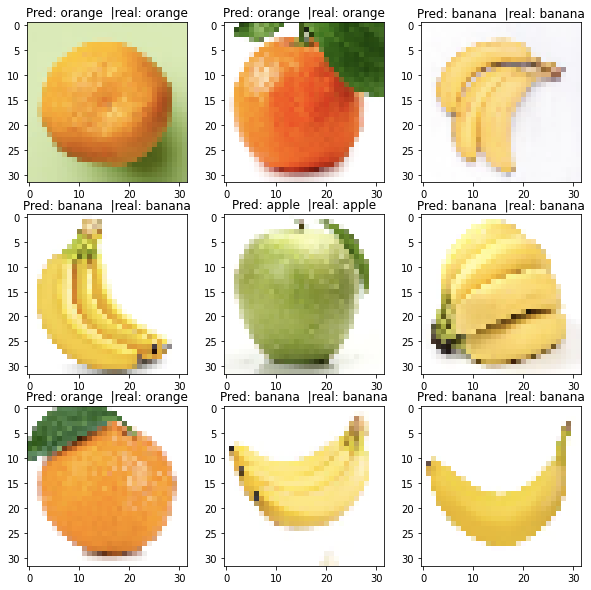

In [18]:
model.evaluate(test_ds)
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications=model(images)
    #print(classifications)
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index=numpy.argmax(classifications[i])
        plt.title("Pred: "+class_names[index]+"  |real: "+class_names[labels[i]])


In [19]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model.tflite",'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpuzd4gz8l/assets
